## Clustering - FIFA 22

### Načtení knihoven

In [74]:
import numpy as np
import pandas as pd
import sklearn
import sklearn.preprocessing, sklearn.cluster, sklearn.metrics
import scipy.spatial
import matplotlib.pyplot as plt
import seaborn as sns

### Načtení dat ze souboru

In [75]:
df = pd.read_csv('players_fifa22.csv',index_col=0)
pd.set_option('display.max_columns', None)
df.head()

Name                      FullName  Age  Height  Weight  \
ID                                                                             
158023           L. Messi                  Lionel Messi   34     170      72   
188545     R. Lewandowski            Robert Lewandowski   32     185      81   
20801   Cristiano Ronaldo  C. Ronaldo dos Santos Aveiro   36     187      83   
231747          K. Mbappé                 Kylian Mbappé   22     182      73   
200389           J. Oblak                     Jan Oblak   28     188      87   

                                                PhotoUrl Nationality  Overall  \
ID                                                                              
158023  https://cdn.sofifa.com/players/158/023/22_60.png   Argentina       93   
188545  https://cdn.sofifa.com/players/188/545/22_60.png      Poland       92   
20801   https://cdn.sofifa.com/players/020/801/22_60.png    Portugal       91   
231747  https://cdn.sofifa.com/players/231/747/22_60.png      France       91   
200389  https://cdn.sofifa.com/players/200/389/22_60.png    Slovenia       91   

        Potential  Growth  TotalStats  BaseStats Positions BestPosition  \
ID                                                                        
158023         93       0        2219        462  RW,ST,CF           RW   
188545         92       0        2212        460        ST           ST   
20801          91       0        2208        457     ST,LW           ST   
231747         95       4        2175        470     ST,LW           ST   
200389         93       2        1413        489        GK           GK   

                       Club   ValueEUR  WageEUR  ReleaseClause ClubPosition  \
ID                                                                            
158023  Paris Saint-Germain   78000000   320000      144300000           RW   
188545    FC Bayern München  119500000   270000      197200000           ST   
20801     Manchester United   45000000   270000       83300000           ST   
231747  Paris Saint-Germain  194000000   230000      373500000           ST   
200389   Atlético de Madrid  112000000   130000      238000000           GK   

        ContractUntil  ClubNumber  ClubJoined  OnLoad NationalTeam  \
ID                                                                   
158023         2023.0        30.0        2021   False    Argentina   
188545         2023.0         9.0        2014   False       Poland   
20801          2023.0         7.0        2021   False     Portugal   
231747         2022.0         7.0        2018   False       France   
200389         2023.0        13.0        2014   False  Not in team   

       NationalPosition  NationalNumber PreferredFoot  IntReputation  \
ID                                                                     
158023               RW            10.0          Left              5   
188545               ST             9.0         Right              5   
20801                ST             7.0         Right              5   
231747               LW            10.0         Right              4   
200389              NaN             NaN         Right              5   

        WeakFoot  SkillMoves AttackingWorkRate DefensiveWorkRate  PaceTotal  \
ID                                                                            
158023         4           4            Medium               Low         85   
188545         4           4              High            Medium         78   
20801          4           5              High               Low         87   
231747         4           5              High               Low         97   
200389         3           1            Medium            Medium         87   

        ShootingTotal  PassingTotal  DribblingTotal  DefendingTotal  \
ID                                                                    
158023             92            91              95              34   
188545             92            79              

### EDA

### Počty záznamů a sloupců

In [3]:
df.shape

(19260, 89)

- 19 260 záznamů o hráčích
- 89 jejich atributů

### Sloupce v datasetu

In [4]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19260 entries, 158023 to 261932
Data columns (total 89 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               19260 non-null  object 
 1   FullName           19260 non-null  object 
 2   Age                19260 non-null  int64  
 3   Height             19260 non-null  int64  
 4   Weight             19260 non-null  int64  
 5   PhotoUrl           19260 non-null  object 
 6   Nationality        19260 non-null  object 
 7   Overall            19260 non-null  int64  
 8   Potential          19260 non-null  int64  
 9   Growth             19260 non-null  int64  
 10  TotalStats         19260 non-null  int64  
 11  BaseStats          19260 non-null  int64  
 12  Positions          19260 non-null  object 
 13  BestPosition       19260 non-null  object 
 14  Club               19260 non-null  object 
 15  ValueEUR           19260 non-null  int64  
 16  WageEUR         

### Obsahuji radky nejake nan?

In [5]:
df.isna().sum().sort_values(ascending=False)[:10]

NationalNumber      18503
NationalPosition    18503
ClubNumber             76
ContractUntil          76
ClubPosition           76
GKHandling              0
GKDiving                0
SlidingTackle           0
StandingTackle          0
Marking                 0
dtype: int64

- 18 503 hráčů nejsou součástí reprezentačních týmů
- 76 je volných hráčů (free agents)

### Describe, popis, počet, průměr...

### Kategorické sloupce

In [6]:
df.describe(exclude=np.number)

Name         FullName  \
count          19260            19260   
unique         18058            19042   
top     J. Rodríguez  Lucas Rodríguez   
freq              12                4   

                                                PhotoUrl Nationality  \
count                                              19260       19260   
unique                                             19156         163   
top     https://cdn.sofifa.com/players/230/388/22_60.png     England   
freq                                                   2        1718   

       Positions BestPosition        Club ClubPosition OnLoad NationalTeam  \
count      19260        19260       19260        19184  19260        19260   
unique       672           15         702           19      2           34   
top           CB           CB  Free agent          SUB  False  Not in team   
freq        2410         3744          76         8293  18143        18503   

       NationalPosition PreferredFoot AttackingWorkRate DefensiveWorkRate  
count               757         19260             19260             19260  
unique               18             2                 3                 3  
top                 SUB         Right            Medium            Medium  
freq                400         14670             12701             14176

- Name - Jméno hráče
- FullName - Celé jméno
- PhotoUrl - Odkaz na fotografii hráče
- Nationality - Národnost
- Positions - posty, na kterých může hrát
- BestPosition - jeho nejhranější pozice, nejlepší
- Club - v jakém klubu hraje (může být i Free Agent)
- ClubPosition - pozice, na které hraje v klubu
- OnLoad - pokud má výstupní klauzuli, tak je True
- NationalTeam - národní tým, za který hraje (může být, že v žádném nehraje)
- NationalPosition - pozice v národním týmu
- PreferredFoot - hlavní noha hráče
- AttackingWorkRate - Síla útočení (Low, Medium, High)
- DefensiveWorkRate - Síla bránění (Low, Medium, High)


### Číselné sloupce

In [7]:
df.describe(include=np.number)

Age        Height        Weight       Overall     Potential  \
count  19260.000000  19260.000000  19260.000000  19260.000000  19260.000000   
mean      25.184683    181.305036     74.950779     65.815628     71.100104   
std        4.737340      6.866151      7.066864      6.817297      6.092103   
min       16.000000    155.000000     49.000000     48.000000     49.000000   
25%       21.000000    176.000000     70.000000     62.000000     67.000000   
50%       25.000000    181.000000     75.000000     66.000000     71.000000   
75%       29.000000    186.000000     80.000000     70.000000     75.000000   
max       54.000000    206.000000    110.000000     93.000000     95.000000   

             Growth    TotalStats     BaseStats      ValueEUR        WageEUR  \
count  19260.000000  19260.000000  19260.000000  1.926000e+04   19260.000000   
mean       5.284476   1598.525909    357.062461  2.857652e+06    8973.528037   
std        5.472201    271.575855     39.910613  7.604532e+06   19415.497147   
min        0.000000    767.000000    227.000000  0.000000e+00       0.000000   
25%        0.000000   1462.000000    329.000000  4.750000e+05    1000.000000   
50%        4.000000   1633.000000    358.000000  9.750000e+05    3000.000000   
75%        9.000000   1782.000000    384.000000  2.000000e+06    8000.000000   
max       26.000000   2341.000000    501.000000  1.940000e+08  350000.000000   

       ReleaseClause  ContractUntil    ClubNumber    ClubJoined  \
count   1.926000e+04   19184.000000  19184.000000  19260.000000   
mean    5.066563e+06    2022.775334     20.820892   2019.324766   
std     1.454190e+07       1.219224     17.743242      2.087867   
min     0.000000e+00    2021.000000      1.000000   2002.000000   
25%     6.940000e+05    2022.000000      9.000000   2019.000000   
50%     1.500000e+06    2022.000000     18.000000   2020.000000   
75%     3.400000e+06    2024.000000     27.000000   2021.000000   
max     3.735000e+08    2031.000000     99.000000   2021.000000   

       NationalNumber  IntReputation      WeakFoot    SkillMoves  \
count      757.000000   19260.000000  19260.000000  19260.000000   
mean        12.643329       1.092887      2.946677      2.354517   
std          7.105190       0.369317      0.670731      0.767592   
min          1.000000       1.000000      1.000000      1.000000   
25%          7.000000       1.000000      3.000000      2.000000   
50%         13.000000       1.000000      3.000000      2.000000   
75%         19.000000       1.000000      3.000000      3.000000   
max         28.000000       5.000000      5.000000      5.000000   

          PaceTotal  ShootingTotal  PassingTotal  DribblingTotal  \
count  19260.000000   19260.000000  19260.000000    19260.000000   
mean      67.910228      53.535514     57.853323       63.028712   
std       10.656453      13.813476      9.835494        9.704853   
min       28.000000      18.000000     25.000000       26.000000   
25%       62.000000      44.000000     52.000000       58.000000   
50%       68.000000      56.000000     58.000000       64.000000   
75%       75.000000      64.000000     65.000000       69.000000   
max       97.000000      94.000000     93.000000       95.000000   

       DefendingTotal  PhysicalityTotal      Crossing     Finishing  \
count      19260.0000      19260.000000  19260.000000  19260.000000   
mean          50.0581         64.676584     49.642835     45.948390   
std           16.3888          9.626269     17.999983     19.702846   
min           14.0000         29.000000      6.000000      2.000000   
25%           35.0000         58.000000     38.000000     30.000000   
50%           54.0000         66.000000     54.000000     50.000000   
75%           63.0000         72.000000     63.000000     62.000000   
max           91.0000         92.000000     94.000000     95.000000   

       HeadingAccuracy  ShortPassing       Volleys     Dribbling  \
count     19260.000000  19260.000000  19260.0

### TOP 10 Zemí s nejvíce hráči

In [8]:

top10N = df.groupby("Nationality").Nationality.count()
top10N = top10N.sort_values(ascending=False).head(10)


- Největší zastoupení hráčů má Anglie, Neměcko a Španělsko

### Věk hráčů

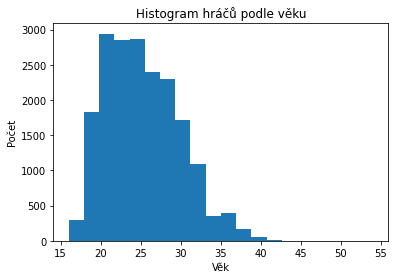

In [9]:
df["Age"].hist(grid=False,bins=20)
plt.xlabel("Věk")
plt.ylabel("Počet")
plt.title("Histogram hráčů podle věku")
plt.show()

- Nejvíce hráčů je ve věku 20 - 30 let

### Nejstarší hráči

In [10]:
top10oldest = df.sort_values(by="Age",ascending=False).head(10)
top10oldest[["FullName","Age"]]

FullName  Age
ID                                 
254704         Kazuyoshi Miura   54
156483      Cristian Lucchetti   43
29552        Shunsuke Nakamura   43
1179          Gianluigi Buffon   43
209805             Daniel Vaca   42
2702             Kevin Ellison   42
213483            Stojan Lukić   41
140222          Paulo Da Silva   41
253638              Joel Pinto   41
102881  Kyriakos Stamatopoulos   41

- Dataset obsahuje i abnormálity co se týče věku, Nejstarším hráčem je Kazuyoshi Miura, 54 let.

### Preferovaná noha fotbalisty

Text(0.5, 1.0, 'Prefrovaná noha hráčů')

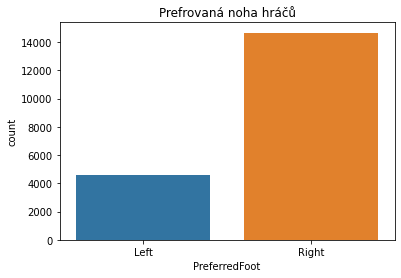

In [11]:
sns.countplot(x='PreferredFoot', data=df)
plt.title("Prefrovaná noha hráčů")

- nejčastěji se vyskytují hráči, kteří hrajou pravou nohou.

### Zastoupení hráčů podle jejich pozic, na které hrají nejčastěji/nejlépe.

In [12]:
plt.figure(figsize=(12,6))
sns.countplot(x='BestPosition', data=df)
plt.title("Počty hráčů podle jejich pozice na hřišti")

Text(0.5, 1.0, 'Počty hráčů podle jejich pozice na hřišti')

- nejvíce se zde nachází CB (Střední obránci), ST (Útočníci), CAM (střední ofenzivní záložníci) a GK (brankáři).

### Potenciál hráčů

- Ukazuje jakého hodnocení se hráč může dostat při nejlepší formě.

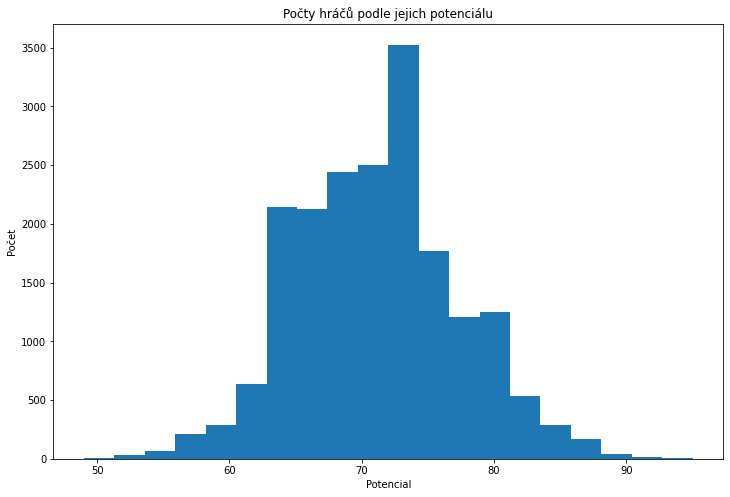

In [13]:
plt.figure(figsize=(20,8))
df["Potential"].hist(figsize=(12,8),bins=20, grid=False)
plt.title("Počty hráčů podle jejich potenciálu")
plt.xlabel("Potencial")
plt.ylabel("Počet")
plt.show()

- Většina hráčů má potenciál mezi 65 - 75.
- 80+ jsou už talentovaní hráči, kteří jsou v nejlepší formě a nebo budou schopni takového potenciálu dosáhnout v budoucnu.


### Celkové hodnocení hráčů 

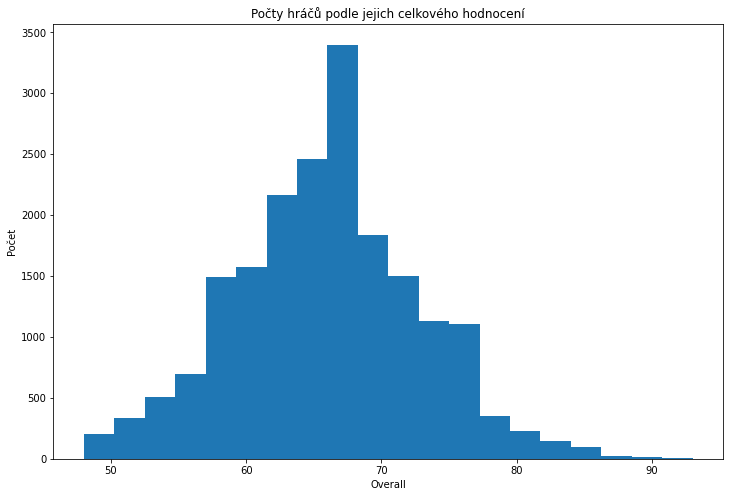

In [14]:
plt.figure(figsize=(20,8))
df["Overall"].hist(figsize=(12,8),bins=20, grid=False)
plt.title("Počty hráčů podle jejich celkového hodnocení")
plt.xlabel("Overall")
plt.ylabel("Počet")
plt.show()

- Nejvíce hráčů, kteří mají Overall 65 - 70
- Hráčů, kteří mají přes 80+ je výrazně méně. Jedná se o aktuálně nejlepší hráče fotbalu.

### Věk x Celkové hodnocení hráčů

<AxesSubplot:xlabel='Overall', ylabel='Age'>

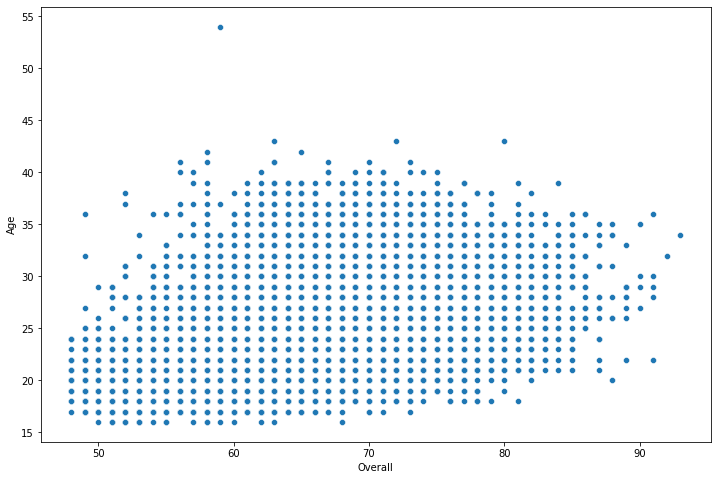

In [15]:
plt.figure(figsize=(12,8))
sns.scatterplot(x="Overall", y="Age", data=df)

- Zobrazena závilost věku a Celkového hodnocení (Overall).
- Hráči s nízkým věkem i Hodnocením, budou mladí hráči chtějí hrát na profi úrovni.
- Hráčů nad 35 let je výrazně méně a mají většinou horší hodnocení až na pár výjimek v pravé části grafu.

### TOP 10 nejlepších hráčů podle Overall

In [16]:
top10 = df.sort_values(by="Overall", ascending=False).head(10)
top10[["FullName","Age","Overall","Nationality","BestPosition","TotalStats"]]

FullName  Age  Overall Nationality BestPosition  \
ID                                                                            
158023                  Lionel Messi   34       93   Argentina           RW   
188545            Robert Lewandowski   32       92      Poland           ST   
20801   C. Ronaldo dos Santos Aveiro   36       91    Portugal           ST   
231747                 Kylian Mbappé   22       91      France           ST   
200389                     Jan Oblak   28       91    Slovenia           GK   
192985               Kevin De Bruyne   30       91     Belgium           CM   
190871    Neymar da Silva Santos Jr.   29       91      Brazil           LW   
215914                  N'Golo Kanté   30       90      France          CDM   
202126                    Harry Kane   27       90     England           ST   
192448         Marc-André ter Stegen   29       90     Germany           GK   

        TotalStats  
ID                  
158023        2219  
188545        2212  
20801         2208  
231747        2175  
200389        1413  
192985        2304  
190871        2183  
215914        2179  
202126        2205  
192448        1444

- Nejlepším hráčem z celého datasetu je Lionel Messi z hodnocením (Overall) 93. 

### Výška a váha nejlepších hráčů

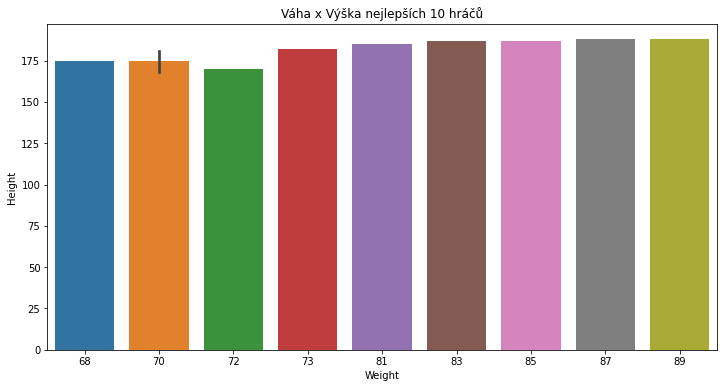

In [17]:
plt.figure(figsize=(12,6))
sns.barplot(x=top10.Weight, y=top10.Height)
plt.title("Váha x Výška nejlepších 10 hráčů")
plt.show()

- Z top 10 jich je z poloviny vyšších jak 175 cm.

### Národnostní rozdělení top 10 nejlepších

In [18]:
top10.Nationality.value_counts()

France       2
Argentina    1
Poland       1
Portugal     1
Slovenia     1
Belgium      1
Brazil       1
England      1
Germany      1
Name: Nationality, dtype: int64

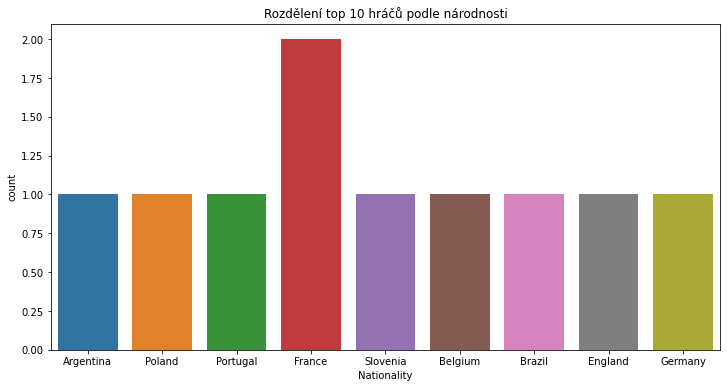

In [19]:
plt.figure(figsize=(12,6))
sns.countplot(x=top10.Nationality)
plt.title("Rozdělení top 10 hráčů podle národnosti")
plt.show()

- Nejvíce jich je z Francie
- Převažují Evropské země

### TOP 10 podle TotalStats

In [20]:
top10s = df.sort_values(by="TotalStats", ascending=False).head(10)
top10s[["FullName","Age","Overall","Nationality","BestPosition","TotalStats"]]

FullName  Age  Overall  Nationality BestPosition  \
ID                                                                              
212198  Bruno Miguel Borges Fernandes   26       88     Portugal          CAM   
209658                  Leon Goretzka   26       87      Germany           CM   
176580                    Luis Suárez   34       88      Uruguay           ST   
192985                Kevin De Bruyne   30       91      Belgium           CM   
224334                   Marcos Acuña   29       84    Argentina           LB   
212622                 Joshua Kimmich   26       89      Germany          CDM   
181291            Georginio Wijnaldum   30       84  Netherlands           CM   
208333                       Emre Can   27       82      Germany          CDM   
194765              Antoine Griezmann   30       85       France          CAM   
177003                    Luka Modrić   35       87      Croatia           CM   

        TotalStats  
ID                  
212198        2341  
209658        2314  
176580        2307  
192985        2304  
224334        2292  
212622        2283  
181291        2271  
208333        2270  
194765        2259  
177003        2253

- Nejlepším hráčem podle TotalStats je Bruno Fernandes s hodnotou 2341
- Hodnoty mezi prvními 5 hráči jsou velmi malé.

### TOP10 podle Potenciálu hráče

In [21]:
top10p = df.sort_values(by="Potential", ascending=False).head(10)
top10p[["FullName","Age","Nationality","Overall","Potential","BestPosition"]]

FullName  Age  Nationality  Overall  Potential  \
ID                                                                     
231747           Kylian Mbappé   22       France       91         95   
158023            Lionel Messi   34    Argentina       93         93   
200389               Jan Oblak   28     Slovenia       91         93   
230621    Gianluigi Donnarumma   22        Italy       89         93   
239085          Erling Haaland   20       Norway       88         93   
237692              Phil Foden   21      England       84         92   
235790             Kai Havertz   22      Germany       84         92   
192448   Marc-André ter Stegen   29      Germany       90         92   
228702         Frenkie de Jong   24  Netherlands       87         92   
231281  Trent Alexander-Arnold   22      England       87         92   

       BestPosition  
ID                   
231747           ST  
158023           RW  
200389           GK  
230621           GK  
239085           ST  
237692          CAM  
235790          CAM  
192448           GK  
228702           CM  
231281           RB

- Hráčem s nejvyšším potenciálem je Kylian Mbappe Overall 91 a Potential 95. 
- Nacházejí se tady více mladší hráči.
- Jsou zde jen 3, kteří mají potenciál stejný/skoro stejný jako jejich Overall

### Hráči podle jejich pozic

#### Útočnici - ST, LW, RW

In [22]:
pozice = ["ST","RW","LW"]
best_strikers = df.loc[(df.Overall >= 85) & (df.BestPosition.isin(pozice))].head(10)
best_strikers[["Name", "Overall", "BestPosition"]]

Name  Overall BestPosition
ID                                             
158023           L. Messi       93           RW
188545     R. Lewandowski       92           ST
20801   Cristiano Ronaldo       91           ST
231747          K. Mbappé       91           ST
190871          Neymar Jr       91           LW
202126            H. Kane       90           ST
208722            S. Mané       89           LW
209331           M. Salah       89           RW
192505          R. Lukaku       88           ST
176580          L. Suárez       88           ST

#### Záložníci

In [23]:
pozice = ["CAM","CM","CDM"]
best_strikers = df.loc[(df.Overall >= 85) & (df.BestPosition.isin(pozice))].head(10)
best_strikers[["Name", "Overall", "BestPosition"]]

Name  Overall BestPosition
ID                                           
192985     K. De Bruyne       91           CM
215914         N. Kanté       90          CDM
200145         Casemiro       89          CDM
212622       J. Kimmich       89          CDM
182521         T. Kroos       88           CM
212198  Bruno Fernandes       88          CAM
199556      M. Verratti       87           CM
177003        L. Modrić       87           CM
189596        T. Müller       87          CAM
195864         P. Pogba       87           CM

#### Obránci

In [24]:
pozice = ["LB","RB","CB"]
best_strikers = df.loc[(df.Overall >= 85) & (df.BestPosition.isin(pozice))].head(15)
best_strikers[["Name", "Overall", "BestPosition"]]

Name  Overall BestPosition
ID                                               
203376          V. van Dijk       89           CB
155862         Sergio Ramos       88           CB
207865           Marquinhos       87           CB
216267         A. Robertson       87           LB
231281  T. Alexander-Arnold       87           RB
239818           Rúben Dias       87           CB
201024         K. Koulibaly       86           CB
232363          M. Škriniar       86           CB
201535            R. Varane       86           CB
189332           Jordi Alba       86           LB
178603           M. Hummels       86           CB
138956         G. Chiellini       86           CB
210514         João Cancelo       86           RB
212218           A. Laporte       86           CB
184344           L. Bonucci       85           CB

#### Brankáři

In [25]:
pozice = ["GK"]
best_strikers = df.loc[(df.Overall >= 85) & (df.BestPosition.isin(pozice))].head(5)
best_strikers[["Name", "Overall", "BestPosition"]]

Name  Overall BestPosition
ID                                         
200389       J. Oblak       91           GK
192448  M. ter Stegen       90           GK
167495       M. Neuer       90           GK
192119    T. Courtois       89           GK
230621  G. Donnarumma       89           GK

### Taletovaní mladí hráči

- Mladí hráči, u kterých je nejvyšší potenciál růstu.

In [26]:
promising_players = df[(df.Growth > 4) & (df.Potential > 85) & (df.Age <= 24)].sort_values(by='Potential', ascending=False)
promising_players[["Name","Age","Nationality","Overall","Potential"]].head(10)

Name  Age  Nationality  Overall  Potential
ID                                                               
239085           E. Haaland   20       Norway       88         93
231281  T. Alexander-Arnold   22      England       87         92
237692             P. Foden   21      England       84         92
235790           K. Havertz   22      Germany       84         92
228702           F. de Jong   24  Netherlands       87         92
251854                Pedri   18        Spain       81         91
242444           João Félix   21     Portugal       83         91
235805            F. Chiesa   23        Italy       83         91
241461        Ferran Torres   21        Spain       82         90
246104       R. Gravenberch   19  Netherlands       78         90

- Nejtalentovanějším mladým hráčem, který má Potenciál větší jako 85 a věk má do 24 je E. Haaland

### 1 - KMeans

### Clustering

- Příprava dat, to znamená odstranění nepotřených sloupců, odstranění duplicitních záznamů, úprava dat jak kategorických tak číselných podle určitého encodingu.

### Duplicitní záznamy

- Při procházení datasetu jsem narazil na to, že obsahuje některé hráče vícekrát se stejnými hodnotami.

In [3]:
print(f"Nalezeno "+ df.duplicated().sum().__str__() + " duplicitních záznamů")

Nalezeno 104 duplicitních záznamů


- Je tedy potřeba odstranit tyto záznamy.

In [76]:
df = df.drop_duplicates()
df.duplicated().sum()

0

### Úprava dat

- v zadání k datasetu bylo řečeno vybrat si  některé sloupců, které jsou podle našeho posouzení vhodné k clusteringu

### Vybrání zajímavých sloupců

In [77]:
df_clustering = df[["Age","Height","Weight","Overall","Potential","BaseStats","Growth","BestPosition","ValueEUR","PreferredFoot",
"IntReputation","PaceTotal","ShootingTotal","PassingTotal","DribblingTotal","DefendingTotal","PhysicalityTotal","GKDiving","GKHandling","GKKicking",
"GKPositioning","GKReflexes"]].copy()
df_clustering.head()

Age  Height  Weight  Overall  Potential  BaseStats  Growth  \
ID                                                                   
158023   34     170      72       93         93        462       0   
188545   32     185      81       92         92        460       0   
20801    36     187      83       91         91        457       0   
231747   22     182      73       91         95        470       4   
200389   28     188      87       91         93        489       2   

       BestPosition   ValueEUR PreferredFoot  IntReputation  PaceTotal  \
ID                                                                       
158023           RW   78000000          Left              5         85   
188545           ST  119500000         Right              5         78   
20801            ST   45000000         Right              5         87   
231747           ST  194000000         Right              4         97   
200389           GK  112000000         Right              5         87   

        ShootingTotal  PassingTotal  DribblingTotal  DefendingTotal  \
ID                                                                    
158023             92            91              95              34   
188545             92            79              85              44   
20801              94            80              87              34   
231747             88            80              92              36   
200389             92            78              90              52   

        PhysicalityTotal  GKDiving  GKHandling  GKKicking  GKPositioning  \
ID                                                                         
158023                65         6          11         15             14   
188545                82        15           6         12              8   
20801                 75         7          11         15             14   
231747                77        13           5          7             11   
200389                90        87          92         78             90   

        GKReflexes  
ID                  
158023           8  
188545          10  
20801           11  
231747           6  
200389          90

In [130]:
df_clustering.shape

(19156, 22)

- z 89 sloupců jsem vybral 22, kterých podle mého by mohly být vhodné ke clusteringu nad těmito daty
- Zvolil takové základní hodnoty hráče, jako je jeho věk, výška, váha, hodnocení, potenciál, růst, celkové statistiky, základní statistiky, pozici, cenu, preferovanou nohu, reputaci, a celkové hodnocení jeho vlastností, které má vlastně ve hře na kartičce.

In [6]:
df_clustering.describe()

Age        Height        Weight       Overall     Potential  \
count  19156.000000  19156.000000  19156.000000  19156.000000  19156.000000   
mean      25.190750    181.304865     74.953226     65.765765     71.050793   
std        4.743117      6.865032      7.068063      6.802014      6.066385   
min       16.000000    155.000000     49.000000     48.000000     49.000000   
25%       21.000000    176.000000     70.000000     61.000000     67.000000   
50%       25.000000    181.000000     75.000000     66.000000     71.000000   
75%       29.000000    186.000000     80.000000     70.000000     75.000000   
max       54.000000    206.000000    110.000000     93.000000     95.000000   

          BaseStats        Growth      ValueEUR  IntReputation     PaceTotal  \
count  19156.000000  19156.000000  1.915600e+04   19156.000000  19156.000000   
mean     356.814784      5.285028  2.825776e+06       1.093287     67.873095   
std       39.843986      5.481207  7.609954e+06       0.370139     10.654588   
min      227.000000      0.000000  0.000000e+00       1.000000     28.000000   
25%      329.000000      0.000000  4.750000e+05       1.000000     62.000000   
50%      358.000000      4.000000  9.750000e+05       1.000000     68.000000   
75%      384.000000      9.000000  2.000000e+06       1.000000     75.000000   
max      501.000000     26.000000  1.940000e+08       5.000000     97.000000   

       ShootingTotal  PassingTotal  DribblingTotal  DefendingTotal  \
count   19156.000000  19156.000000    19156.000000    19156.000000   
mean       53.499478     57.805857       62.978545       50.012842   
std        13.806390      9.828530        9.691676       16.367141   
min        18.000000     25.000000       26.000000       14.000000   
25%        44.000000     51.000000       58.000000       35.000000   
50%        56.000000     58.000000       64.000000       54.000000   
75%        64.000000     64.000000       69.000000       63.000000   
max        94.000000     93.000000       95.000000       91.000000   

       PhysicalityTotal      GKDiving    GKHandling     GKKicking  \
count      19156.000000  19156.000000  19156.000000  19156.000000   
mean          64.644968     16.392149     16.183180     16.038108   
std            9.626229     17.550527     16.827083     16.544122   
min           29.000000      1.000000      1.000000      1.000000   
25%           58.000000      8.000000      8.000000      8.000000   
50%           66.000000     11.000000     11.000000     11.000000   
75%           72.000000     14.000000     14.000000     14.000000   
max           92.000000     91.000000     92.000000     93.000000   

       GKPositioning    GKReflexes  
count   19156.000000  19156.000000  
mean       16.210326     16.481677  
std        17.039720     17.873713  
min         1.000000      1.000000  
25%         8.000000      8.000000  
50%        11.000000     11.000000  
75%        14.000000     14.000000  
max        92.000000     90.000000

In [7]:
df_clustering.describe(exclude=np.number)

BestPosition PreferredFoot
count         19156         19156
unique           15             2
top              CB         Right
freq           3725         14591

### Uprava Kategorickych sloupcu - get_dummies

In [78]:
df_enc = pd.DataFrame(index = df_clustering.index)

- do df_enc ukládám upravané sloupce, které později použiju pro clustering

- pro kategorické sloupce použiju get_dummies, který mi je všechny rozdělí. Nejjednodušší způsob a použil jsem ho protože v datech není žádná spojistost s nějakým pořadím hodnotou.

In [79]:
df_enc = df_enc.join(pd.get_dummies(df[['BestPosition', 'PreferredFoot']]))
df_enc.head()

BestPosition_CAM  BestPosition_CB  BestPosition_CDM  BestPosition_CF  \
ID                                                                             
158023                 0                0                 0                0   
188545                 0                0                 0                0   
20801                  0                0                 0                0   
231747                 0                0                 0                0   
200389                 0                0                 0                0   

        BestPosition_CM  BestPosition_GK  BestPosition_LB  BestPosition_LM  \
ID                                                                           
158023                0                0                0                0   
188545                0                0                0                0   
20801                 0                0                0                0   
231747                0                0                0                0   
200389                0                1                0                0   

        BestPosition_LW  BestPosition_LWB  BestPosition_RB  BestPosition_RM  \
ID                                                                            
158023                0                 0                0                0   
188545                0                 0                0                0   
20801                 0                 0                0                0   
231747                0                 0                0                0   
200389                0                 0                0                0   

        BestPosition_RW  BestPosition_RWB  BestPosition_ST  \
ID                                                           
158023                1                 0                0   
188545                0                 0                1   
20801                 0                 0                1   
231747                0                 0                1   
200389                0                 0                0   

        PreferredFoot_Left  PreferredFoot_Right  
ID                                               
158023                   1                    0  
188545                   0                    1  
20801                    0                    1  
231747                   0                    1  
200389                   0                    1

### Uprava ciselnych sloupcu

- u číselných sloupců si můžu zobrazit jejich histogram, abych věděl jaký Scaler použít, jestli MinMaxScaler nebo PowerTransformer.
- MinMaxScaler na běžné hodnoty jako věk, váha, výška...
- PowerTransformer tam kde hodně záznamů má hodnotu mezi (1-10) a pak další jsou třeba  u  100-1000. Vlastně data nejsou rovnoměrně rozmístěná

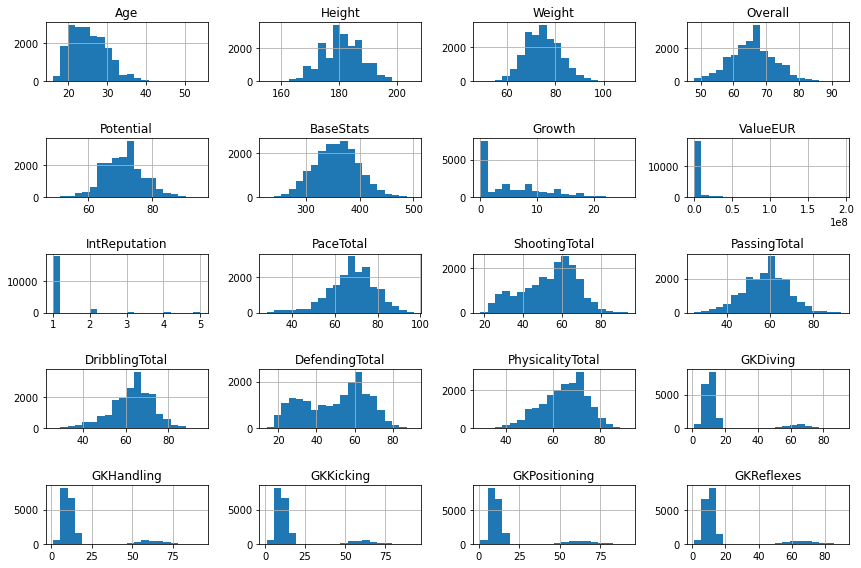

In [11]:
df_clustering.hist(figsize=(12,8),bins=20)
plt.tight_layout()

### Provedení MinMax Scalu, PowerTransform

- podle grafu je třeba potřebné udělat PowerTransform u Growth, IntReputation a všech vlastností od brankáře začínající na GK

In [80]:
df_enc['Age'] = sklearn.preprocessing.minmax_scale(df_clustering.Age)
df_enc['Height'] = sklearn.preprocessing.minmax_scale(df_clustering.Height)
df_enc['Weight'] = sklearn.preprocessing.minmax_scale(df_clustering.Weight)
df_enc['Overall'] = sklearn.preprocessing.minmax_scale(df_clustering.Overall)
df_enc['Potential'] = sklearn.preprocessing.minmax_scale(df_clustering.Potential)
df_enc['Growth'] = sklearn.preprocessing.PowerTransformer().fit_transform(df_clustering[['Growth']])
df_enc['BaseStats'] = sklearn.preprocessing.minmax_scale(df_clustering.BaseStats)
df_enc['ValueEUR'] = sklearn.preprocessing.PowerTransformer().fit_transform(df_clustering[['ValueEUR']])
df_enc['IntReputation'] = sklearn.preprocessing.PowerTransformer().fit_transform(df_clustering[['IntReputation']])
df_enc['PaceTotal'] = sklearn.preprocessing.minmax_scale(df_clustering.PaceTotal)
df_enc['ShootingTotal'] = sklearn.preprocessing.minmax_scale(df_clustering.ShootingTotal)
df_enc['PassingTotal'] = sklearn.preprocessing.minmax_scale(df_clustering.PassingTotal)
df_enc['DribblingTotal'] = sklearn.preprocessing.minmax_scale(df_clustering.DribblingTotal)
df_enc['DefendingTotal'] = sklearn.preprocessing.minmax_scale(df_clustering.DefendingTotal)
df_enc['PhysicalityTotal'] = sklearn.preprocessing.minmax_scale(df_clustering.PhysicalityTotal)
df_enc['GKKicking'] = sklearn.preprocessing.PowerTransformer().fit_transform(df_clustering[['GKKicking']])
df_enc['GKDiving'] = sklearn.preprocessing.PowerTransformer().fit_transform(df_clustering[['GKDiving']])
df_enc['GKPositioning'] = sklearn.preprocessing.PowerTransformer().fit_transform(df_clustering[['GKPositioning']])
df_enc['GKReflexes'] = sklearn.preprocessing.PowerTransformer().fit_transform(df_clustering[['GKReflexes']])
df_enc['GKHandling'] = sklearn.preprocessing.PowerTransformer().fit_transform(df_clustering[['GKHandling']])


### Zobrazeni upravenych dat

In [13]:
df_enc.head()

BestPosition_CAM  BestPosition_CB  BestPosition_CDM  BestPosition_CF  \
ID                                                                             
158023                 0                0                 0                0   
188545                 0                0                 0                0   
20801                  0                0                 0                0   
231747                 0                0                 0                0   
200389                 0                0                 0                0   

        BestPosition_CM  BestPosition_GK  BestPosition_LB  BestPosition_LM  \
ID                                                                           
158023                0                0                0                0   
188545                0                0                0                0   
20801                 0                0                0                0   
231747                0                0                0                0   
200389                0                1                0                0   

        BestPosition_LW  BestPosition_LWB  BestPosition_RB  BestPosition_RM  \
ID                                                                            
158023                0                 0                0                0   
188545                0                 0                0                0   
20801                 0                 0                0                0   
231747                0                 0                0                0   
200389                0                 0                0                0   

        BestPosition_RW  BestPosition_RWB  BestPosition_ST  \
ID                                                           
158023                1                 0                0   
188545                0                 0                1   
20801                 0                 0                1   
231747                0                 0                1   
200389                0                 0                0   

        PreferredFoot_Left  PreferredFoot_Right       Age    Height    Weight  \
ID                                                                              
158023                   1                    0  0.473684  0.294118  0.377049   
188545                   0                    1  0.421053  0.588235  0.524590   
20801                    0                    1  0.526316  0.627451  0.557377   
231747                   0                    1  0.157895  0.529412  0.393443   
200389                   0                    1  0.315789  0.647059  0.622951   

         Overall  Potential    Growth  BaseStats  ValueEUR  IntReputation  \
ID                                                                          
158023  1.000000   0.956522 -1.216461   0.857664  3.903221       3.608825   
188545  0.977778   0.934783 -1.216461   0.850365  4.403299       3.608825   
20801   0.955556   0.913043 -1.216461   0.839416  3.291291       3.608825   
231747  0.955556   1.000000  0.204306   0.886861  4.999727       3.608825   
200389  0.955556   0.956522 -0.269366   0.956204  4.325837       3.608825   

        PaceTotal  ShootingTotal  PassingTotal  DribblingTotal  \
ID                                                               
158023   0.826087       0.973684      0.970588        1.000000   
188545   0.724638       0.973684      0.794118        0.855072   
20801    0.855072       1.000000      0.808824        0.884058   
231747   1.000000       0.921053      0.808824        0.956522   
200389   0.855072       0.973684      0.779412        0.927536   

        DefendingTotal  PhysicalityTotal  GKKicking  GKDiving  GKPositioning  \
ID                                                                             
158023        0.259740          0.571429   0.642616 -1.519445       0.527959   
188545        0.389610          0.841270   0.247708  0.643189      -0.684423   
20801         0.2597

### Popis sloupcu

In [14]:
df_enc.describe()

BestPosition_CAM  BestPosition_CB  BestPosition_CDM  BestPosition_CF  \
count      19156.000000     19156.000000      19156.000000     19156.000000   
mean           0.121424         0.194456          0.078096         0.003393   
std            0.326628         0.395792          0.268329         0.058154   
min            0.000000         0.000000          0.000000         0.000000   
25%            0.000000         0.000000          0.000000         0.000000   
50%            0.000000         0.000000          0.000000         0.000000   
75%            0.000000         0.000000          0.000000         0.000000   
max            1.000000         1.000000          1.000000         1.000000   

       BestPosition_CM  BestPosition_GK  BestPosition_LB  BestPosition_LM  \
count     19156.000000     19156.000000     19156.000000     19156.000000   
mean          0.055440         0.110618         0.053769         0.044686   
std           0.228842         0.313667         0.225567         0.206618   
min           0.000000         0.000000         0.000000         0.000000   
25%           0.000000         0.000000         0.000000         0.000000   
50%           0.000000         0.000000         0.000000         0.000000   
75%           0.000000         0.000000         0.000000         0.000000   
max           1.000000         1.000000         1.000000         1.000000   

       BestPosition_LW  BestPosition_LWB  BestPosition_RB  BestPosition_RM  \
count     19156.000000      19156.000000     19156.000000     19156.000000   
mean          0.009501          0.016653         0.054657         0.083107   
std           0.097011          0.127970         0.227314         0.276051   
min           0.000000          0.000000         0.000000         0.000000   
25%           0.000000          0.000000         0.000000         0.000000   
50%           0.000000          0.000000         0.000000         0.000000   
75%           0.000000          0.000000         0.000000         0.000000   
max           1.000000          1.000000         1.000000         1.000000   

       BestPosition_RW  BestPosition_RWB  BestPosition_ST  PreferredFoot_Left  \
count     19156.000000      19156.000000     19156.000000        19156.000000   
mean          0.017018          0.018375         0.138808            0.238307   
std           0.129342          0.134308         0.345755            0.426059   
min           0.000000          0.000000         0.000000            0.000000   
25%           0.000000          0.000000         0.000000            0.000000   
50%           0.000000          0.000000         0.000000            0.000000   
75%           0.000000          0.000000         0.000000            0.000000   
max           1.000000          1.000000         1.000000            1.000000   

       PreferredFoot_Right           Age        Height        Weight  \
count         19156.000000  19156.000000  19156.000000  19156.000000   
mean              0.761693      0.241862      0.515782      0.425463   
std               0.426059      0.124819      0.134608      0.115870   
min               0.000000      0.000000      0.000000      0.000000   
25%               1.000000      0.131579      0.411765      0.344262   
50%               1.000000      0.236842      0.509804      0.426230   
75%               1.000000      0.342105      0.607843      0.508197   
max               1.000000      1.000000      1.000000      1.000000   

            Overall     Potential        Growth     BaseStats      ValueEUR  \
count  19156.000000  19156.000000  1.915600e+04  19156.000000  1.915600e+04   
mean       0.394795      0.479365 -1.424350e-16      0.473777  2.848699e-16   
std        0.151156      0.131878  1.000026e+00      0.145416  1.000026e+00   
min        0.000000      0.000000 -1.216461e+00      0.000000 -5.260990e+00   
25%        0.288889      0.391304 -1.216461e+00      0.372263 -5.984783e-01   
50%        0.400000      0.478261  2.043056e-

### Uložení hodnot z df_enc bez labelů do X 

In [81]:
X = df_enc.values

### Elbow Metoda, nalezení hodnoty K 

- Elbow method slouží k nalezení ideální hodnoty  k pro KMeans
- Použijeme dva způsoby:  SSE a Silhouette

<AxesSubplot:xlabel='k'>

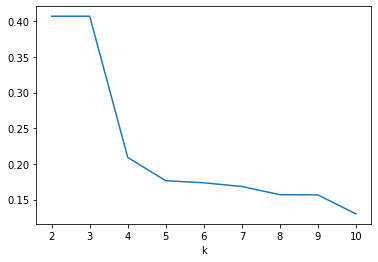

In [758]:
clustering_scores = []
for k in range(2, 11):
    clustering = sklearn.cluster.KMeans(n_clusters=k).fit(X)
    clustering_scores.append({
        'k': k,
        'sse': clustering.inertia_,
        'silhouette': sklearn.metrics.silhouette_score(X, clustering.labels_)
    })
df_clustering_scores = pd.DataFrame.from_dict(clustering_scores, orient='columns')
df_clustering_scores = df_clustering_scores.set_index('k')
df_clustering_scores.sse.plot()
plt.figure()
df_clustering_scores.silhouette.plot()

- podle grafů vychází jako ideální hodnota k = 4

### Provedení clusteringu pro 4 clustery

- použití Kmeans z knihovny

In [16]:
cls1 = sklearn.cluster.KMeans(n_clusters=4)
clustering = cls1.fit(X)

- zjištění kolik hodnot obsahuje, který cluster.

In [17]:
pd.Series(clustering.labels_).value_counts()

3    9248
2    6564
0    2117
1    1227
dtype: int64

- je vidět, že vznikly dva větší clustery a potom dva mnohem menší.

### Přidání sloupce určují cluster záznamu hráče.

In [18]:
df_clustering["cluster_id"] = clustering.labels_

#### Zobrazení záznamů s identifikací id clusteru

In [19]:
df_clustering.head()

Age  Height  Weight  Overall  Potential  BaseStats  Growth  \
ID                                                                   
158023   34     170      72       93         93        462       0   
188545   32     185      81       92         92        460       0   
20801    36     187      83       91         91        457       0   
231747   22     182      73       91         95        470       4   
200389   28     188      87       91         93        489       2   

       BestPosition   ValueEUR PreferredFoot  IntReputation  PaceTotal  \
ID                                                                       
158023           RW   78000000          Left              5         85   
188545           ST  119500000         Right              5         78   
20801            ST   45000000         Right              5         87   
231747           ST  194000000         Right              4         97   
200389           GK  112000000         Right              5         87   

        ShootingTotal  PassingTotal  DribblingTotal  DefendingTotal  \
ID                                                                    
158023             92            91              95              34   
188545             92            79              85              44   
20801              94            80              87              34   
231747             88            80              92              36   
200389             92            78              90              52   

        PhysicalityTotal  GKDiving  GKHandling  GKKicking  GKPositioning  \
ID                                                                         
158023                65         6          11         15             14   
188545                82        15           6         12              8   
20801                 75         7          11         15             14   
231747                77        13           5          7             11   
200389                90        87          92         78             90   

        GKReflexes  cluster_id  
ID                              
158023           8           1  
188545          10           1  
20801           11           1  
231747           6           1  
200389          90           1

### Describe nad jednotlivými clustery

- pro číselné sloupce

In [20]:
df_clustering.groupby('cluster_id').describe()

Age                                                     Height  \
             count       mean       std   min   25%   50%   75%   max   count   
cluster_id                                                                      
0           2117.0  26.179972  5.512764  16.0  22.0  25.0  30.0  43.0  2117.0   
1           1227.0  28.947025  4.061673  18.0  26.0  29.0  32.0  39.0  1227.0   
2           6564.0  29.115783  3.013657  20.0  27.0  29.0  31.0  54.0  6564.0   
3           9248.0  21.680039  2.378307  16.0  20.0  22.0  24.0  35.0  9248.0   

                                                                     Weight  \
                  mean       std    min    25%    50%    75%    max   count   
cluster_id                                                                    
0           188.511573  4.778406  174.0  185.0  188.0  192.0  206.0  2117.0   
1           181.685412  6.422494  158.0  177.0  182.0  186.0  200.0  1227.0   
2           180.542200  6.497943  156.0  176.0  180.0  185.0  203.0  6564.0   
3           180.145978  6.580206  155.0  175.0  180.0  185.0  204.0  9248.0   

                                                               Overall  \
                 mean       std   min   25%   50%   75%    max   count   
cluster_id                                                               
0           81.668871  6.280799  60.0  78.0  81.0  86.0  107.0  2117.0   
1           76.468623  6.978968  55.0  72.0  76.0  81.0  100.0  1227.0   
2           75.250152  6.643638  54.0  70.0  75.0  80.0  110.0  6564.0   
3           73.004109  6.494841  49.0  69.0  73.0  77.0  104.0  9248.0   

                                                              Potential  \
                 mean       std   min   25%   50%   75%   max     count   
cluster_id                                                                
0           64.341993  7.385304  48.0  59.0  64.0  69.0  90.0    2117.0   
1           77.459658  4.711130  63.0  74.0  77.0  80.0  93.0    1227.0   
2           67.617154  4.656131  49.0  65.0  67.0  71.0  83.0    6564.0   
3           63.226103  6.126864  48.0  59.0  63.0  67.0  85.0    9248.0   

                                                              BaseStats  \
                 mean       std   min   25%   50%   75%   max     count   
cluster_id                                                                
0           69.708077  6.141279  51.0  66.0  69.0  74.0  90.0    2117.0   
1           78.746536  5.575097  63.0  75.0  79.0  83.0  95.0    1227.0   
2           68.024832  4.702144  49.0  65.0  68.0  71.0  85.0    6564.0   
3           72.484862  5.564256  52.0  69.0  72.0  76.0  90.0    9248.0   

                                                                      Growth  \
                  mean        std    min    25%    50%    75%    max   count   
cluster_id                                                                     
0           354.648559  41.344572  260.0  325.0  353.0  382.0  501.0  2117.0   
1           411.404238  32.946512  294.0  390.0  415.0  435.0  501.0  1227.0   
2           366.267063  32.405741  245.0  346.0  368.0  388.0  466.0  6564.0   
3           343.358888  36.975272  227.0  318.0  343.0  368.0  478.0  9248.0   

                                                          ValueEUR  \
                mean       std  min  25%  50%   75%   max    count   
cluster_id                                                           
0           5.366084  5.482542  0.0  0.0  4.0   9.0  26.0   2117.0   
1           1.286879  2.328107  0.0  0.0  0.0   2.0  14.0   1227.0   
2           0.407678  0.811604  0.0  0.0  0.0   1.0   4.0   6564.0   
3           9.258759  4.401055  0.0  6.0  9.0  12.0  25.0   9248.0   

                                                                         \
                    mean           std       min        25%         50%   
cluster_id                                                                
0           1.649572e+06  4.180222e+06       

- jde vyčíst, že v jednom clusteru se nacházejí průměrně vyšší hráči(cca 188.5 cm) než v ostatních clusterech.
- Cluster s id = 2 obsahuje hráče s vyšším Overall než v ostatních. Pravděpodobně v něm budou nejlepé hodnocení hráči z datasetu. Taky jejich ValueEUR tomu odpovídá a IntReputation.
- v posledním clusteru jsou hráči s největším  průměrným růstem.
- Potom podle vlastnosti Brankářů jde vidět, že cluster s id = 1 bude obsahovat z většiny brankáře.

### Describe pro kategoricke sloupce podle clusteru

In [21]:
df_clustering.groupby('cluster_id').describe(include='O')

BestPosition                  PreferredFoot                    
                  count unique top  freq         count unique    top  freq
cluster_id                                                                
0                  2117      4  GK  2113          2117      2  Right  1888
1                  1227     15  CB   255          1227      2  Right   921
2                  6564     14  CB  1470          6564      2  Right  4889
3                  9248     14  CB  1998          9248      2  Right  6893

- Tady jde vidět, že cluster s id = 1 má jen 4 unikátní hodnoty v pozici a většinově převládají brankáři.

### Věkové rozložení v clusterech

<AxesSubplot:xlabel='cluster_id', ylabel='Age'>

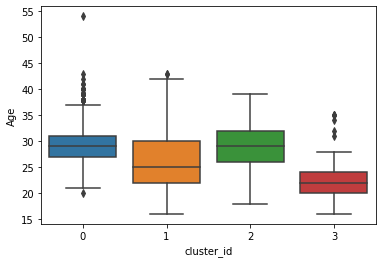

In [767]:
sns.boxplot(data=df_clustering, y="Age",x="cluster_id")

- První cluster má zastoupení starších hráčů než v ostatních clusterech.
- Poslední cluster má zase výrazně mladší hráče, ale vyskytují se tam i ti, kteří jsou starší přes 30 let.

### Výška hráčů v jednotlivých clusterech

<AxesSubplot:xlabel='cluster_id', ylabel='Height'>

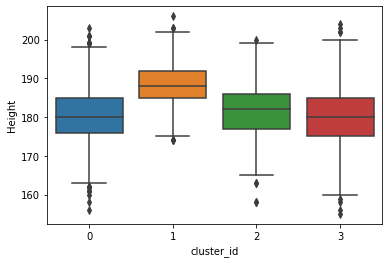

In [768]:
sns.boxplot(data=df_clustering, y="Height",x="cluster_id")

- v druhém clusteru jsou výrazně vyšší hráči než v ostatních.
- Ostatní clustery mají hráče s průměrnou výšškou 180 - 185 cm.

### Váha hráčů podle clusterů

<AxesSubplot:xlabel='cluster_id', ylabel='Weight'>

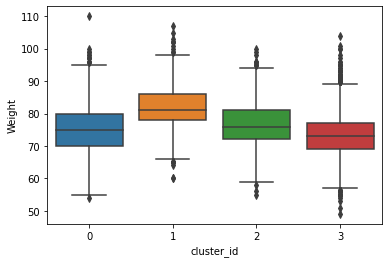

In [769]:
sns.boxplot(data=df_clustering, y="Weight",x="cluster_id")

- Z tohoto porovnání není moc vidět. Jen druhý cluster vybočuje. Hráči mají větší váhu, což vlastně dáva smysl protože se v tomto clusteru nacházejí vyšší hráči.

### Celkové hodnocení (Overall) v clusterech

<AxesSubplot:xlabel='cluster_id', ylabel='Overall'>

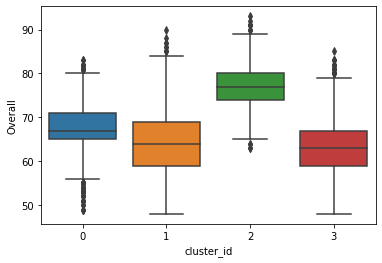

In [770]:
sns.boxplot(data=df_clustering, y="Overall",x="cluster_id")

- Třetí cluster obsahuje hráče s mnohem vyšším hodnocením než v ostatních. Celkově se liší od ostatních, kteří obsahují hráče s výrazně menším Overallem.
- Takže bude obsahovat nejlepší hráče z datasetu.

### Potential v clusterech

<AxesSubplot:xlabel='cluster_id', ylabel='Potential'>

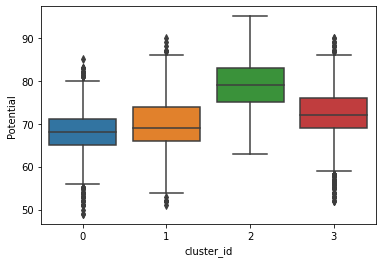

In [771]:
sns.boxplot(data=df_clustering, y="Potential",x="cluster_id")

- Třetí cluster obsahuje hráče s vyšším potenciálem než v ostatních.

### Growth

In [772]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df_clustering, y="Growth",x="cluster_id")

<AxesSubplot:xlabel='cluster_id', ylabel='Growth'>

- První cluster má nejmenší míru růstu hráčů a třetí cluster ho následuje.
- Největší má poslední cluster.

### ValueEUR

<AxesSubplot:xlabel='cluster_id', ylabel='ValueEUR'>

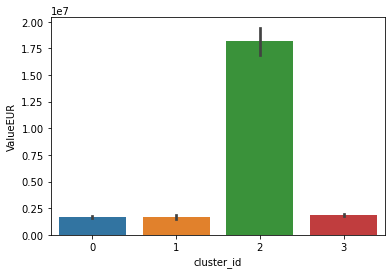

In [773]:
sns.barplot(data=df_clustering, y="ValueEUR",x="cluster_id")

- Třetí cluster má nejdražší hráče.

### BaseStats

In [774]:
sns.barplot(data=df_clustering, y="BaseStats",x="cluster_id")

<AxesSubplot:xlabel='cluster_id', ylabel='BaseStats'>

- Třetí cluster má trochu vyšší BaseStats.
- ostatní mají cca stejné.

### GKReflexes

In [775]:
plt.figure(figsize=(8,10))
sns.boxplot(data=df_clustering, y="GKReflexes",x="cluster_id")


<AxesSubplot:xlabel='cluster_id', ylabel='GKReflexes'>

- Z tohoto jde přesně říct, že druhý cluster jsou brankáři až na pár outlierů

### PreferredFoot

In [776]:
sns.countplot(data=df_clustering, x="cluster_id", hue="PreferredFoot")

<AxesSubplot:xlabel='cluster_id', ylabel='count'>

- Žádný cluster nějak nevybočuje, že se v něm nacházeli jen levonozí nebo pravonozí hráči. 

### BestPosition

- Rozdělení pozic v clusterech

In [777]:
plt.figure(figsize=(12,8))
sns.countplot(data=df_clustering,x="cluster_id", hue="BestPosition",palette="pastel")

<AxesSubplot:xlabel='cluster_id', ylabel='count'>

- Druhý cluster jsou jen Brankáři.

### IntReputation

<AxesSubplot:xlabel='cluster_id', ylabel='count'>

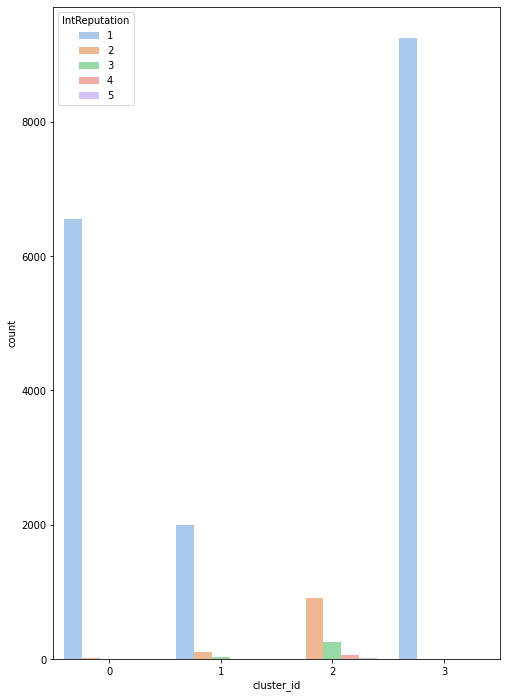

In [778]:

plt.figure(figsize=(8,12))
sns.countplot(data=df_clustering,x="cluster_id", hue="IntReputation", palette="pastel")

- Třetí cluster jsou výrazně populárnější hráči než v ostatních.
- první a poslední mají nejvíce IntReputation na nule.

### 2 - DBSCAN

- Jsou potřebné dva parametry min_samples a eps.
- min_samples je maximálně počet_dimenzí(sloupců) * 2
- eps(epsilon) odhadneme podle výpočtu průměrné vzdálenosti mezi všemi body a jejím 2 * počet_dimenzí neblížšími sousedy. Setřídíme a zobrazíme pomocí grafu, ze kterého vyčteme potřebnou hodnotu eps.

### Načtu si DBSCAN z knihoven

In [82]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

### Výpočet vzdáleností

In [97]:
neighbors = NearestNeighbors(n_neighbors= 44 )
neighbors_fit = neighbors.fit(df_enc)
distances, indices = neighbors_fit.kneighbors(df_enc)

### Setřízení vzdáleností vzestupně

In [98]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]


### Vykreslení do grafu

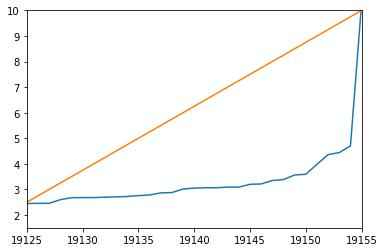

In [128]:
plt.plot(distances)
plt.axis([19125,19155,1.5,10])

point1 = [19125,2.5]
point2 = [19155, 10]
x_values = [point1[0], point2[0]]
y_values = [point1[1], point2[1]]
plt.plot(x_values, y_values)

- pokud bychom od oranžové čáry vedli kolmici k vykresleným modrým bodům, tak nejdelší bude někde v místě x = 19150 

- pravděpodobně tedy  optimální hodnota pro eps bude 3.5

### Provedení DBSCAN

In [117]:

cls1 = sklearn.cluster.DBSCAN(min_samples=2*df.shape[1],eps=3.5)
clustering = cls1.fit(X)

### Zobrazení rozdělení clusterů

In [118]:
pd.Series(clustering.labels_).value_counts()

 1    17716
 0     1261
-1      179
dtype: int64

### Přidání sloupce identifikující clustery

In [119]:
df_clustering["cluster_id"] = clustering.labels_

### Výpis záznamů s  identifikací

In [120]:
df_clustering.head()

Age  Height  Weight  Overall  Potential  BaseStats  Growth  \
ID                                                                   
158023   34     170      72       93         93        462       0   
188545   32     185      81       92         92        460       0   
20801    36     187      83       91         91        457       0   
231747   22     182      73       91         95        470       4   
200389   28     188      87       91         93        489       2   

       BestPosition   ValueEUR PreferredFoot  IntReputation  PaceTotal  \
ID                                                                       
158023           RW   78000000          Left              5         85   
188545           ST  119500000         Right              5         78   
20801            ST   45000000         Right              5         87   
231747           ST  194000000         Right              4         97   
200389           GK  112000000         Right              5         87   

        ShootingTotal  PassingTotal  DribblingTotal  DefendingTotal  \
ID                                                                    
158023             92            91              95              34   
188545             92            79              85              44   
20801              94            80              87              34   
231747             88            80              92              36   
200389             92            78              90              52   

        PhysicalityTotal  GKDiving  GKHandling  GKKicking  GKPositioning  \
ID                                                                         
158023                65         6          11         15             14   
188545                82        15           6         12              8   
20801                 75         7          11         15             14   
231747                77        13           5          7             11   
200389                90        87          92         78             90   

        GKReflexes  cluster_id  
ID                              
158023           8           0  
188545          10           0  
20801           11           0  
231747           6           0  
200389          90          -1

### Popis clusterů

In [121]:
df_clustering.groupby('cluster_id').describe()

Age                                                     \
              count       mean       std   min   25%   50%   75%   max   
cluster_id                                                               
-1            179.0  29.770950  5.614792  17.0  26.0  29.0  33.0  54.0   
 0           1261.0  29.165741  4.157071  18.0  26.0  29.0  32.0  43.0   
 1          17716.0  24.861538  4.618969  16.0  21.0  24.0  28.0  43.0   

             Height                                                           \
              count        mean       std    min    25%    50%    75%    max   
cluster_id                                                                     
-1            179.0  185.463687  6.673995  166.0  181.0  187.0  190.0  199.0   
 0           1261.0  182.045202  6.609182  158.0  178.0  182.0  187.0  201.0   
 1          17716.0  181.210149  6.868946  155.0  176.0  181.0  186.0  206.0   

             Weight                                                      \
              count       mean       std   min   25%   50%   75%    max   
cluster_id                                                                
-1            179.0  80.262570  7.755628  56.0  75.0  81.0  86.0   96.0   
 0           1261.0  76.798573  7.194731  55.0  72.0  77.0  82.0  102.0   
 1          17716.0  74.768232  7.012188  49.0  70.0  75.0  80.0  110.0   

            Overall                                                     \
              count       mean       std   min   25%   50%   75%   max   
cluster_id                                                               
-1            179.0  73.625698  8.595113  55.0  67.5  73.0  80.0  91.0   
 0           1261.0  77.247423  4.625225  63.0  74.0  77.0  80.0  93.0   
 1          17716.0  64.869101  6.078838  48.0  61.0  65.0  69.0  85.0   

           Potential                                                     \
               count       mean       std   min   25%   50%   75%   max   
cluster_id                                                                
-1             179.0  75.754190  8.070331  56.0  69.0  76.0  82.0  93.0   
 0            1261.0  78.486122  5.502453  63.0  74.0  78.0  82.0  95.0   
 1           17716.0  70.474035  5.700271  49.0  67.0  70.0  74.0  90.0   

           BaseStats                                                     \
               count        mean        std    min    25%    50%    75%   
cluster_id                                                                
-1             179.0  396.983240  51.971630  274.0  359.0  397.0  439.5   
 0            1261.0  411.018239  32.239020  294.0  390.0  414.0  434.0   
 1           17716.0  352.550802  37.039207  227.0  327.0  354.0  379.0   

                    Growth                                                 \
              max    count      mean       std  min  25%  50%   75%   max   
cluster_id                                                                  
-1          501.0    179.0  2.128492  3.792397  0.0  0.0  0.0   3.0  26.0   
 0          496.0   1261.0  1.238699  2.303750  0.0  0.0  0.0   1.0  14.0   
 1          478.0  17716.0  5.604933  5.531303  0.0  0.0  5.0  10.0  26.0   

           ValueEUR                                                   \
              count          mean           std       min        25%   
cluster_id                                                             
-1            179.0  1.148863e+07  2.213401e+07       0.0        0.0   
 0           1261.0  1.694815e+07  2.104729e+07  110000.0  3100000.0   
 1          17716.0  1.733037e+06  3.168427e+06       0.0   475000.0   

                                               IntReputation            \
                  50%         75%          max         count      mean   
cluster_id                                                               
-1           325000.0  13750000.0  119500000.0         179.0  1.877095   
 0          9000000.0  23000000.0  194000000.0        1261.0  2.292625   
 1           900000.0   17

In [122]:
df_clustering.groupby('cluster_id').describe(include='O')

BestPosition                  PreferredFoot                     
                  count unique top  freq         count unique    top   freq
cluster_id                                                                 
-1                  179     14  GK    73           179      2  Right    137
 0                 1261     15  CB   250          1261      2  Right    962
 1                17716     15  CB  3448         17716      2  Right  13492

- Máme tři clustery, kdy v jenom převažují brankáři.
- V ostatních jsou nejčastěji CB, stopeři.
- Třetí cluster má průměrně mladší hráče oproti předchozím a taky nižší Overall
- Druhý cluster má největší průměrný Overall s maximálním hodnotou 93. Opět nejvyšší potenciál, BaseStats, ValueEUR a Reputaci.
- Poslední cluster má nejhorší BaseStats, ale zase má nejvyšší průměrnou hodnotu růstu (Growth) ze všech clusterů.
- Podle hráčských vlastnosti jako je PaceTotal, ShootingTotal atd. je nejlepší druhý cluster. Obsahuje hráče s lepšími schopnostmi než ostatní.
- Podle GK vlastností odpovídá první cluster pozici brankáře nejčastěji.



### Clustery

### Věk

In [129]:
sns.boxplot(data=df_clustering, y="Age",x="cluster_id")

<AxesSubplot:xlabel='cluster_id', ylabel='Age'>

- první dva clustery mají cca stejné rozmezí věku, až na to, že v první se liší o outliera, kterým je hráč s věkem 55 let.
- třetí cluster má převážně mladší hráče.

### Height

<AxesSubplot:xlabel='cluster_id', ylabel='Height'>

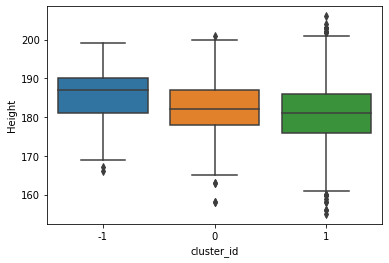

In [132]:
sns.boxplot(data=df_clustering, y="Height",x="cluster_id")

- Tady nejde moc vyčíst.
- Třetí cluster se trochu vychyluje od prvních dvou. Větší rozpětí výšky hráčů.

### Weight

<AxesSubplot:xlabel='cluster_id', ylabel='Weight'>

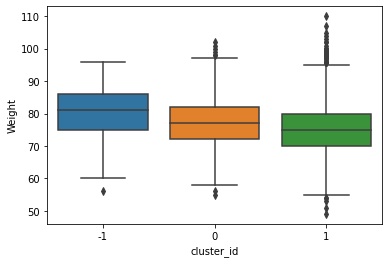

In [133]:
sns.boxplot(data=df_clustering, y="Weight",x="cluster_id")

- Opět třetí cluster větší rozpětí, podobně jako bylo u výšky.
- První cluster má větší zastoupení hráčů s váhou 75-85 kg.

### Overall

<AxesSubplot:xlabel='cluster_id', ylabel='Overall'>

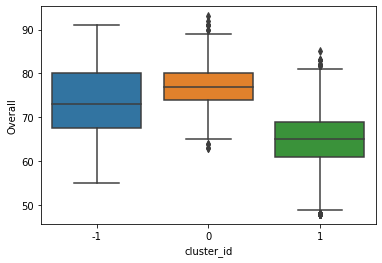

In [130]:
sns.boxplot(data=df_clustering, y="Overall",x="cluster_id")

- Jde vidět, že třetí cluster má hráče s nejhorším hodnocením max se tam objevují nějací s Overallem do 84.
- Druhý cluster obsahuje výrazně lépe hodnocené hráče. s minimem 65 a max přes 92.
- První má hodně hráču s ratingem 68 - 80.

### Potential

In [134]:
sns.boxplot(data=df_clustering, y="Potential",x="cluster_id")

<AxesSubplot:xlabel='cluster_id', ylabel='Potential'>

- První dva clustery vyšší potenciál než třetí.
- Nejlépe vychází druhý cluster. Celkově lepší Potential hráčů.

### Growth

In [135]:
sns.boxplot(data=df_clustering, y="Growth",x="cluster_id")

<AxesSubplot:xlabel='cluster_id', ylabel='Growth'>

- Tady se hráči rozdělili hlavně podle Růstu.
- Kdy druhý cluster má minimální růst hráčů, oproti prvnímu a třetí. 
- Poslední cluster se výrazně liší. Obsahuje velký počet hráčů s s růstem 0-10 a pak ještě hráče s růstem až do hodnoty 25.
- Ostatní clustery se drží hodně nízko první cluster 0-7 a druhý 0-3. Kdy obsahují i nějaké speciální případy hráčů, kterří mají vysoký růst, ale to se jedná jen o pár desítek hráčů.

### BaseStats

<AxesSubplot:xlabel='cluster_id', ylabel='BaseStats'>

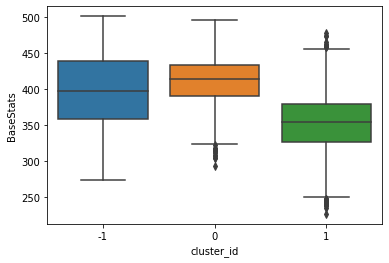

In [136]:
sns.boxplot(data=df_clustering, y="BaseStats",x="cluster_id")

- Druhý cluster si stojí lépe se základními zkušenosti hráčů.
- Třetí cluster je výrazně níž.
- První zase obsahuje výrazně větší zastoupení hráčů v rozmezí 360 - 440 s průměrem 400.

### ValueEUR

In [137]:
sns.boxplot(data=df_clustering, y="ValueEUR",x="cluster_id")

<AxesSubplot:xlabel='cluster_id', ylabel='ValueEUR'>

- Podle ceny obsahuje druhý cluster nejdražší hráče. 
- Třetí cluster zase ty nejméně hodnotově ohodnocené.

### Reputation

- Podle reputace je druhý cluster na tom nejlépe, za ním je hned druhý.
- Třetí cluster má reputaci kolem hodnoty 1.

### GKReflexes

In [139]:
sns.boxplot(data=df_clustering, y="GKReflexes",x="cluster_id")

<AxesSubplot:xlabel='cluster_id', ylabel='GKReflexes'>

- Podle tohoto jde vidět, že první cluster obsahuje hráče s nejlepšími vlastnosti k hodící se k brankáři.

### PaceTotal

In [141]:
sns.boxplot(data=df_clustering, y="PaceTotal",x="cluster_id")

<AxesSubplot:xlabel='cluster_id', ylabel='PaceTotal'>

- Podle vlasnosti PaceTotal, nejde nic zajímavého vyčíst.

### DribblingTotal

In [143]:
sns.boxplot(data=df_clustering, y="DribblingTotal",x="cluster_id")

<AxesSubplot:xlabel='cluster_id', ylabel='DribblingTotal'>

In [144]:
sns.boxplot(data=df_clustering, y="ShootingTotal",x="cluster_id")

<AxesSubplot:xlabel='cluster_id', ylabel='ShootingTotal'>

<AxesSubplot:xlabel='cluster_id', ylabel='PassingTotal'>

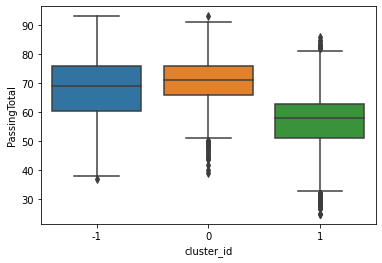

In [145]:
sns.boxplot(data=df_clustering, y="PassingTotal",x="cluster_id")

- Podle hráčských vlastností střely, přihrávky, driblink a rychlosti jsou vycházejí clustery přibližně stejně rozložené, kdy druhý cluster je na tom lépe než první a nejhuře na tom je třetí cluster.

### Obranné vlasnosti

In [149]:
sns.boxplot(data=df_clustering, y="DefendingTotal",x="cluster_id")

<AxesSubplot:xlabel='cluster_id', ylabel='DefendingTotal'>

- podle hodnocení bránění je na tom nejlépe druhý cluster. Lépe bránící hráče obsahuje. Za ním je třetí zelený cluster.

<AxesSubplot:xlabel='cluster_id', ylabel='PhysicalityTotal'>

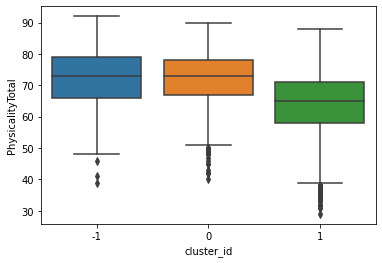

In [150]:
sns.boxplot(data=df_clustering, y="PhysicalityTotal",x="cluster_id")

- První a druhý cluster jsou na tom nejlépe co se týče  hodnoceni fyzické síly.

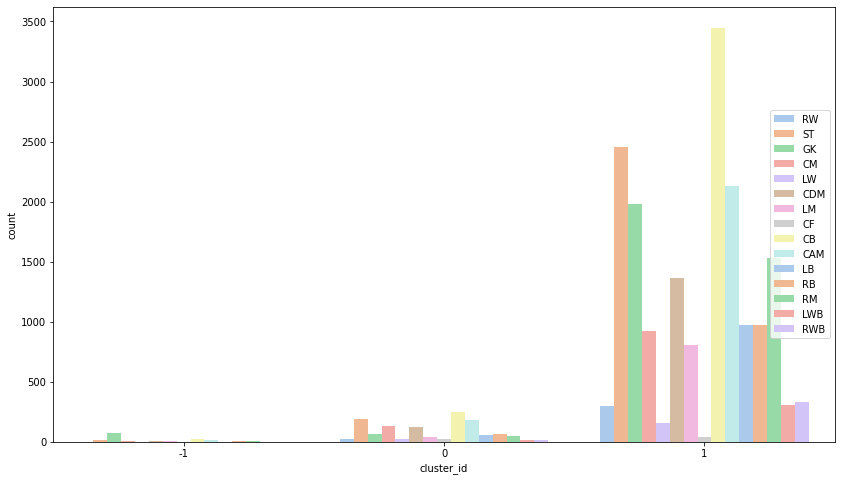

In [131]:
plt.figure(figsize=(14,8))
sns.countplot(data=df_clustering,x="cluster_id", hue="BestPosition",palette="pastel")
plt.legend(loc="right")


- První cluster má převázně brankáře, druhý a  třetí obránce.
- Samozřejmě třetí cluster má největší počet hráčů, to odpovídá i grafu.

### Reputace

<AxesSubplot:xlabel='cluster_id', ylabel='count'>

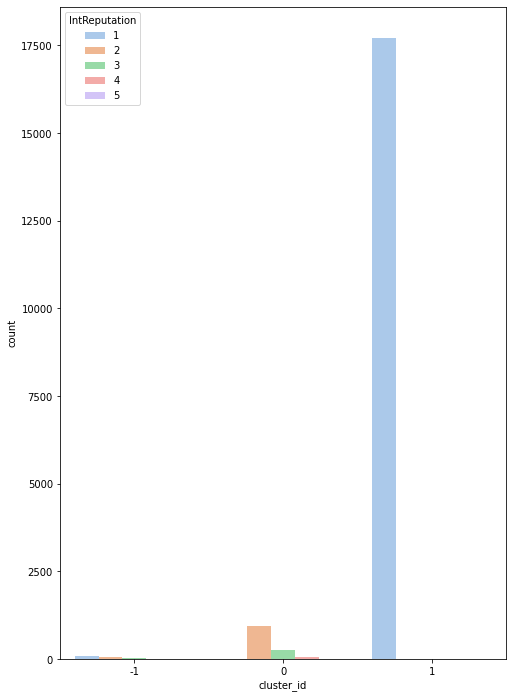

In [153]:

plt.figure(figsize=(8,12))
sns.countplot(data=df_clustering,x="cluster_id", hue="IntReputation", palette="pastel")

- Co se týče reputace hráčů, tak druhý cluster obsahuje hráče s vyšší reputací než v ostatních clusterech.
- Tím, že jsou lepší, lépe hodnocení tak to odpovídá jejich reputaci.

### Zavěr

Kmeans
- Pro mnou vybrané sloupce (features), které jsem upravil pro co nejlepší zpracování Kmeans algoritmem mi pomocí Elbow metody vyšla hodnota 4 pro k.
- Vznikly tedy 4 clustery, kdy jeden obsahoval hráče s vyšším Overall (Celkovým hodnocením) i Cenou. 
- Dále vznikl cluster, ve kterém se nacházeli převážně brankáři až na 4 případy. V ostatních clusterech byly skoro všechny pozice zahrnuty.
- Taky se clustery liší v Reputaci hráčů, jeden cluster osahuje hlavně velice známé hráče (hodnota IntReputation větší jak 2).
- Z Clusterů jde vyčíst i rozdělení podle jejich růstu (Growth), kdy máme clustery s hráči s vysokým růstem (druhý cluster a poslední) a potom clustery, které mají velice nízký růst až na pár outlier dat. Vlastně jeden z těch clusterů, který má nejmenší růst je ten, který obsahuje hráče s nejvyšším Overallem.
- Poslední Cluster obsahuje hráče s nejnižším věkem. Naproti tomu první cluster obsahuje starší hráč včetně nejstaršího hráče, kterému je přes 50 let.

DBSCAN
- 3 clustery, kdy v jednom jsou nejlépe hodnocení hráči, potom cluster, kde jsou hlavně brankáři a třetí, kde je hodně mladých hráčů.
- První cluster brankáři podle vyčtených vlastností, GKReflexes atd., v některých případech vlastností podobné k druhému clusteru.
- Druhý cluster obsahuje nejlepší hráče fotbalu, odpovídá to jejich hodnocení, potenciálu, ceně, reputaci i jejich vlasnostem - střela, přihrávka...
- Poslední cluster jsou mladí hráči převážně, s vysokým růstem oproti předchozím clusterům. Ti měli minimální až skoro žádný růst (Growth).
